In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.Transported.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [6]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [7]:
train.HomePlanet.groupby(train.Transported).value_counts()

Transported  HomePlanet
False        Earth         2651
             Mars           839
             Europa         727
True         Earth         1951
             Europa        1404
             Mars           920
Name: count, dtype: int64

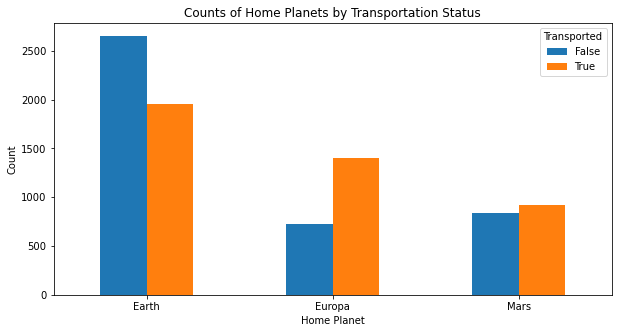

In [8]:
data_to_plot = train.groupby('Transported')['HomePlanet'].value_counts().unstack(level=0)

# Plotting
data_to_plot.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Home Planet')
plt.ylabel('Count')
plt.title('Counts of Home Planets by Transportation Status')
plt.xticks(rotation=0)  # Rotates the x labels for better readability
plt.legend(title='Transported')
plt.show()

In [9]:
train['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

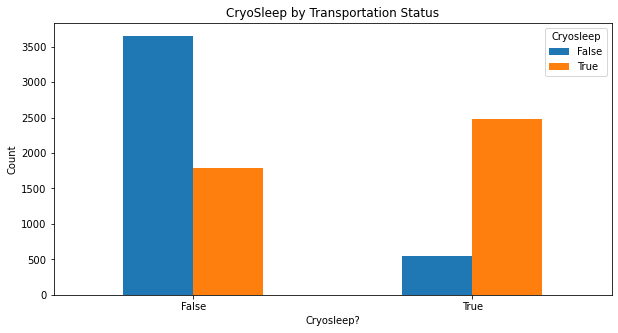

In [10]:
data_to_plot = train.groupby('Transported')['CryoSleep'].value_counts().unstack(level=0)

# Plotting
data_to_plot.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Cryosleep?')
plt.ylabel('Count')
plt.title('CryoSleep by Transportation Status')
plt.xticks(rotation=0)  # Rotates the x labels for better readability
plt.legend(title='Cryosleep')
plt.show()

seems to be an important predictor

In [11]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [12]:
train['Cabin'].nunique()

6560

In [13]:
train['Cabin'].head(10)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [14]:
train['Cabin'].str.split('/')[0]

['B', '0', 'P']

In [15]:
train['Cabin'].fillna('null').apply(lambda x: x.split('/')[0]).head()

0    B
1    F
2    A
3    A
4    F
Name: Cabin, dtype: object

In [16]:
train['CabDeck'] = train['Cabin'].apply(lambda x: x.split('/')[0] if pd.notna(x) else x)
train['CabNum'] = train['Cabin'].apply(lambda x: x.split('/')[1] if pd.notna(x) else x)
train['CabSide'] = train['Cabin'].apply(lambda x: x.split('/')[2] if pd.notna(x) else x)

train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabDeck       8494 non-null   object 
 15  CabNum        8494 non-null   object 
 16  CabSide       8494 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


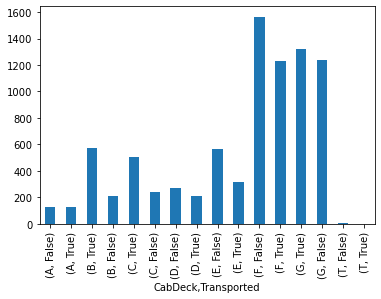

In [18]:
train.groupby('CabDeck')['Transported'].value_counts().plot(kind='bar')
plt.show()

In [19]:
train[train['CabNum'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False,NaN,NaN,NaN
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Book Trad,True,NaN,NaN,NaN
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,3929.0,764.0,Graviph Aloubtled,False,NaN,NaN,NaN
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,92.0,319.0,Diedow Resty,False,NaN,NaN,NaN
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Froos Sad,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,3939.0,NaN,Naosura Motled,False,NaN,NaN,NaN
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,3786.0,0.0,Coxan Statch,False,NaN,NaN,NaN
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,0.0,0.0,Bath Brakeng,True,NaN,NaN,NaN
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Beula Clemondsey,False,NaN,NaN,NaN


In [20]:
# Fill in null values
train[['CabDeck', 'CabNum', 'CabSide']].describe()

,CabDeck,CabNum,CabSide
count,8494,8494,8494
unique,8,1817,2
top,F,82,S
freq,2794,28,4288


In [21]:
import pandas as pd

# Convert 'CabNum' to numeric, coercing errors to NaN
train['CabNum'] = pd.to_numeric(train['CabNum'], errors='coerce')

# Calculate the median of 'CabNum' after conversion
median_cabnum = train['CabNum'].median()

# Replace NaN values with the median
train['CabNum'] = train['CabNum'].fillna(median_cabnum)

# Convert to 'Int64' for nullable integer type
train['CabNum'] = train['CabNum'].astype('Int64')

# Display DataFrame info to confirm the updates
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  CabDeck       8494 non-null   object 
 15  CabNum        8693 non-null   Int64  
 16  CabSide       8494 non-null   object 
dtypes: Int64(1), bool(1), float64(6), object(9)
memory usage: 1.1+ MB


In [22]:
train['CabNum'].describe()

count        8693.0
mean     596.398942
std      506.637799
min             0.0
25%           173.0
50%           427.0
75%           983.0
max          1894.0
Name: CabNum, dtype: Float64

In [23]:
# Convert 'CabNum' to numeric, coercing errors to NaN
train['CabNum'] = pd.to_numeric(train['CabNum'], errors='coerce')

# Define bins using deciles and apply them to the data
train['CabNumBinned'] = pd.qcut(train['CabNum'], 5, labels=[str(i) for i in range(1, 6)])

# Display the new column and its distribution
print(train[['CabNum', 'CabNumBinned']].head())
print(train['CabNumBinned'].value_counts())

   CabNum CabNumBinned
0       0            1
1       0            1
2       0            1
3       0            1
4       1            1
CabNumBinned
1    1747
3    1739
5    1739
2    1734
4    1734
Name: count, dtype: int64


In [24]:
train[['CabDeck', 'CabNumBinned', 'CabNum', 'CabSide']].describe(include='all')

,CabDeck,CabNumBinned,CabNum,CabSide
count,8494,8693,8693.0,8494
unique,8,5,<NA>,2
top,F,1,<NA>,S
freq,2794,1747,<NA>,4288
mean,NaN,NaN,596.398942,NaN
std,NaN,NaN,506.637799,NaN
min,NaN,NaN,0.0,NaN
25%,NaN,NaN,173.0,NaN
50%,NaN,NaN,427.0,NaN
75%,NaN,NaN,983.0,NaN


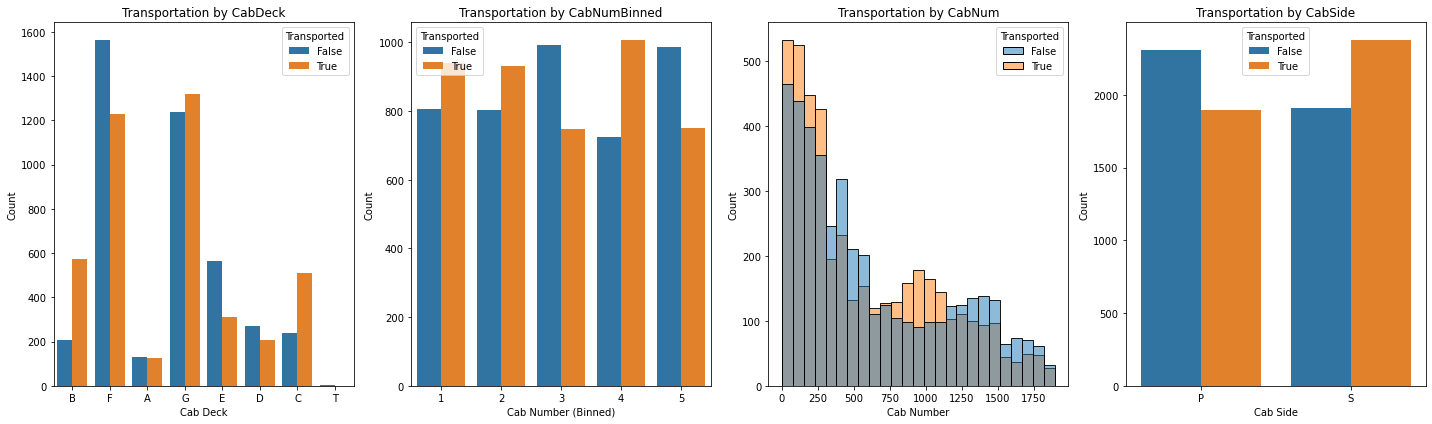

In [25]:
# Setting up the figure and subplots
fig, ax = plt.subplots(1, 4, figsize=(20, 6))  # Correct figsize and subplot creation

# Plot for CabDeck
sns.countplot(data=train, x='CabDeck', hue='Transported', ax=ax[0])
ax[0].set_title("Transportation by CabDeck")  # Set title method corrected
ax[0].set_xlabel('Cab Deck')
ax[0].set_ylabel('Count')

# Plot for CabNumBinned
sns.countplot(data=train, x='CabNumBinned', hue='Transported', ax=ax[1])
ax[1].set_title("Transportation by CabNumBinned")
ax[1].set_xlabel('Cab Number (Binned)')
ax[1].set_ylabel('Count')

# Plot for CabNum
sns.histplot(data=train, x='CabNum', hue='Transported', ax=ax[2])
ax[2].set_title("Transportation by CabNum")
ax[2].set_xlabel('Cab Number')
ax[2].set_ylabel('Count')

# Plot for CabSide
sns.countplot(data=train, x='CabSide', hue='Transported', ax=ax[3])
ax[3].set_title("Transportation by CabSide")
ax[3].set_xlabel('Cab Side')
ax[3].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
train.drop('Cabin', axis=1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Destination   8511 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
dtypes: Int64(1), bool(1), category(1), float64(6), objec

## Destination

In [27]:
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

/Users/bdogellis/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Destination', ylabel='count'>

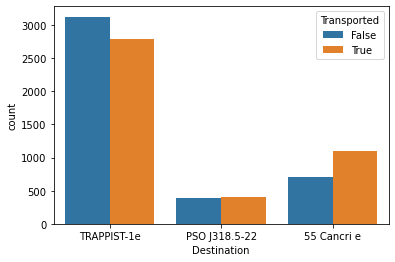

In [28]:
sns.countplot(train['Destination'], hue=train['Transported'])

In [29]:
train['Destination'].isna().sum()

182

In [30]:
train[train['Destination'].isna()].head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide,CabNumBinned
47,0045_02,Mars,True,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True,F,10,P,1
128,0138_02,Earth,False,NaN,34.0,False,0.0,22.0,0.0,564.0,207.0,Monah Gambs,False,E,5,P,1
139,0152_01,Earth,False,NaN,41.0,False,0.0,0.0,0.0,0.0,607.0,Andan Estron,False,F,32,P,1
347,0382_01,NaN,False,NaN,23.0,False,348.0,0.0,0.0,4.0,368.0,Blanie Floydendley,False,G,64,P,1
430,0462_01,Earth,True,NaN,50.0,False,0.0,0.0,0.0,0.0,0.0,Ronia Sosanturney,False,G,67,S,1
468,0504_03,Europa,True,NaN,24.0,False,0.0,0.0,0.0,0.0,0.0,Sterops Unpasine,True,B,19,S,1
529,0564_03,Europa,False,NaN,28.0,False,0.0,410.0,2.0,1354.0,3695.0,Aldibi Dinsprody,False,B,24,P,1
540,0571_04,Europa,True,NaN,30.0,False,0.0,0.0,0.0,0.0,NaN,Izark Hednigic,True,C,21,P,1
547,0576_01,Earth,False,NaN,21.0,False,0.0,NaN,625.0,110.0,0.0,Melice Herry,False,F,107,S,1
570,0597_01,Earth,True,NaN,23.0,False,0.0,0.0,0.0,0.0,0.0,Arllia Roachoanand,True,G,91,P,1


In [31]:
# Fill this column

## Age

<AxesSubplot:ylabel='Frequency'>

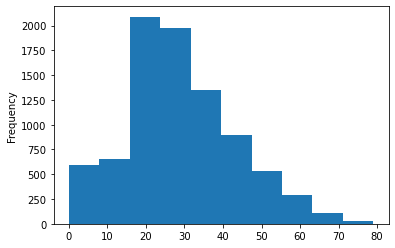

In [32]:
train['Age'].plot(kind='hist')

In [33]:
train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [34]:
train.groupby('Transported')['Age'].mean()

Transported
False    29.922858
True     27.748834
Name: Age, dtype: float64

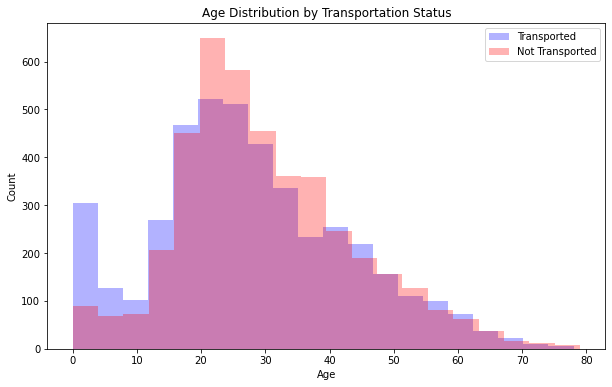

In [35]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for passengers who were transported
ax.hist(train['Age'][train['Transported'] == True], bins=20, alpha=0.3, color='blue', label='Transported')

# Histogram for passengers who were not transported
ax.hist(train['Age'][train['Transported'] == False], bins=20, alpha=0.3, color='red', label='Not Transported')

# Adding title and labels
ax.set_title('Age Distribution by Transportation Status')
ax.set_xlabel('Age')
ax.set_ylabel('Count')

# Adding legend to distinguish the groups
ax.legend()

# Show the plot
plt.show()

In [36]:
train.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Destination   8511 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
dtypes: Int64(1), bool(1), category(1), float64(6), objec

## VIP

In [37]:
train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [38]:
train.groupby('VIP')['Transported'].value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: count, dtype: int64

In [39]:
train.groupby('VIP')['Transported'].value_counts(normalize=True)

VIP    Transported
False  True           0.506332
       False          0.493668
True   False          0.618090
       True           0.381910
Name: proportion, dtype: float64

In [40]:
train['VIP'].isna().sum()

203

In [41]:
train[train['VIP'].isna()].head(10) # should impute because of MAR

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide,CabNumBinned
38,0036_01,Earth,False,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False,F,8,S,1
102,0108_03,Earth,False,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True,G,19,S,1
145,0165_01,Mars,True,TRAPPIST-1e,35.0,NaN,0.0,0.0,0.0,0.0,0.0,Graven Anche,True,F,37,P,1
228,0244_02,Mars,True,55 Cancri e,14.0,NaN,0.0,0.0,0.0,0.0,0.0,Tous Sad,True,F,47,S,1
566,0593_01,Mars,False,TRAPPIST-1e,NaN,NaN,43.0,152.0,182.0,1.0,2005.0,Hon Kra,False,D,24,P,1
582,0607_01,Europa,False,TRAPPIST-1e,37.0,NaN,27.0,654.0,10.0,881.0,9568.0,Dyonium Hontichre,False,C,22,P,1
596,0619_01,Europa,True,TRAPPIST-1e,39.0,NaN,0.0,0.0,0.0,0.0,0.0,Scellus Holatirint,True,C,24,S,1
646,0679_01,Earth,False,TRAPPIST-1e,20.0,NaN,NaN,215.0,0.0,541.0,0.0,Vana Nichoan,False,G,104,S,1
649,0680_03,Earth,True,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,0.0,0.0,Joandy Camerrison,False,G,105,P,1
678,0709_02,Europa,True,55 Cancri e,25.0,NaN,0.0,NaN,0.0,0.0,0.0,Thaban Missefle,True,A,7,S,1


## RoomService

In [42]:
train['RoomService'].describe()

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

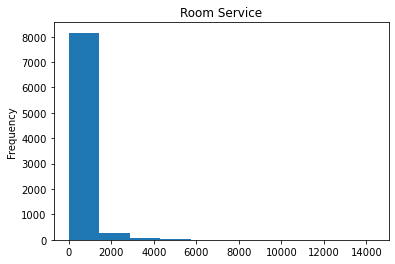

In [43]:
train['RoomService'].plot(kind='hist')
plt.title('Room Service')
plt.show()

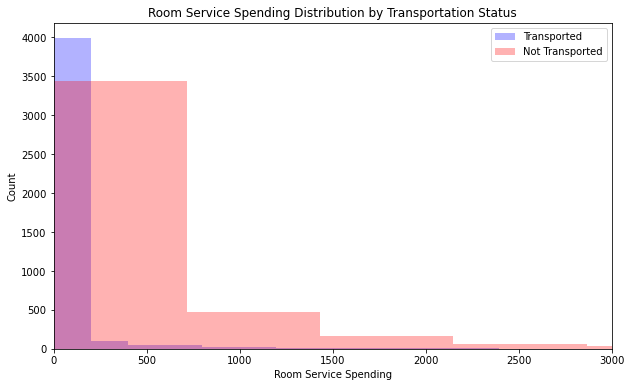

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for passengers who used room service and were transported
ax.hist(train['RoomService'][train['Transported'] == True], bins=20, alpha=0.3, color='blue', label='Transported')

# Histogram for passengers who used room service and were not transported
ax.hist(train['RoomService'][train['Transported'] == False], bins=20, alpha=0.3, color='red', label='Not Transported')

# Adding title and labels
ax.set_title('Room Service Spending Distribution by Transportation Status')
ax.set_xlabel('Room Service Spending')
ax.set_ylabel('Count')
ax.set_xlim(0, 3000)

# Adding legend to distinguish the groups
ax.legend()

# Show the plot
plt.show()


In [45]:
print("Transported: \n" + "-" *50 + f"\n{train['RoomService'][train['Transported']==True].describe()}")
print()
print("Not Transported: \n" + "-" *50 + f"\n{train['RoomService'][train['Transported']==False].describe()}")

Transported: 
--------------------------------------------------
count    4295.000000
mean       63.098021
std       274.812497
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3992.000000
Name: RoomService, dtype: float64

Not Transported: 
--------------------------------------------------
count     4217.000000
mean       389.266066
std        875.638123
min          0.000000
25%          0.000000
50%          1.000000
75%        473.000000
max      14327.000000
Name: RoomService, dtype: float64


These summary statistics as well as the histogram gives credence to the idea room service spending and transportation are highly correlated

In [46]:
train['RoomService'].corr(train['Transported'])

-0.24461142158527574

In [47]:
train['RoomService'].isna().sum()

181

In [48]:
train[train['RoomService'].isna()].head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide,CabNumBinned
25,0020_05,Earth,True,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False,E,0,S,1
35,0031_03,Mars,False,TRAPPIST-1e,20.0,False,NaN,0.0,1750.0,990.0,0.0,Dontch Datie,True,F,9,P,1
83,0091_01,Earth,True,TRAPPIST-1e,26.0,False,NaN,0.0,0.0,0.0,0.0,Deanne Yorkland,True,G,16,S,1
132,0141_01,Mars,False,TRAPPIST-1e,31.0,False,NaN,0.0,97.0,0.0,0.0,Pyrohs Harte,False,F,30,P,1
170,0193_02,Mars,False,TRAPPIST-1e,23.0,False,NaN,0.0,8.0,1072.0,0.0,Frook Raf,False,F,41,P,1
220,0234_01,Earth,False,TRAPPIST-1e,43.0,False,NaN,888.0,0.0,0.0,0.0,Keitha Josey,False,F,50,P,1
233,0250_01,Earth,True,PSO J318.5-22,47.0,False,NaN,0.0,0.0,0.0,0.0,Camily Kramosley,False,G,38,S,1
280,0310_01,Europa,False,TRAPPIST-1e,67.0,False,NaN,230.0,0.0,4476.0,241.0,Naviton Coudered,False,NaN,427,NaN,3
319,0357_01,Earth,False,TRAPPIST-1e,41.0,False,NaN,1198.0,0.0,124.0,572.0,Eduard Mcleaney,False,F,65,S,1
368,0407_01,Earth,False,TRAPPIST-1e,23.0,False,NaN,21.0,0.0,0.0,1699.0,Dandy Mirez,False,G,69,P,1


In [49]:
train[train['RoomService'].isna()]['Transported'].value_counts()# Missing at random

Transported
False    98
True     83
Name: count, dtype: int64

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Destination   8511 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
dtypes: Int64(1), bool(1), category(1), float64(6), objec

## FoodCourt

In [51]:
train['FoodCourt'].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [52]:
print("Transported: \n" + "-" *50 + f"\n{train['FoodCourt'][train['Transported']==True].describe()}")
print()
print("Not Transported: \n" + "-" *50 + f"\n{train['FoodCourt'][train['Transported']==False].describe()}")

Transported: 
--------------------------------------------------
count     4279.000000
mean       532.691984
std       1931.306995
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29813.000000
Name: FoodCourt, dtype: float64

Not Transported: 
--------------------------------------------------
count     4231.000000
mean       382.615930
std       1200.115601
min          0.000000
25%          0.000000
50%          0.000000
75%        179.000000
max      16856.000000
Name: FoodCourt, dtype: float64


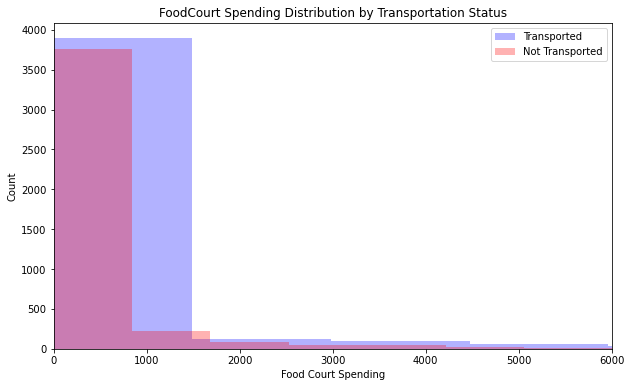

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for passengers who used room service and were transported
ax.hist(train['FoodCourt'][train['Transported'] == True], bins=20, alpha=0.3, color='blue', label='Transported')

# Histogram for passengers who used room service and were not transported
ax.hist(train['FoodCourt'][train['Transported'] == False], bins=20, alpha=0.3, color='red', label='Not Transported')

# Adding title and labels
ax.set_title('FoodCourt Spending Distribution by Transportation Status')
ax.set_xlabel('Food Court Spending')
ax.set_ylabel('Count')
ax.set_xlim(0, 6000)

# Adding legend to distinguish the groups
ax.legend()

# Show the plot
plt.show()

In [54]:
train['FoodCourt'].corr(train['RoomService'])

-0.01588893935923882

In [55]:
train['FoodCourt'].corr(train['Transported'])

0.04656639376472207

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Destination   8511 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
dtypes: Int64(1), bool(1), category(1), float64(6), objec

## ShoppingMall, Spa, VRDeck

Transported (ShoppingMall): 
--------------------------------------------------
count     4264.000000
mean       179.829972
std        722.026714
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      23492.000000
Name: ShoppingMall, dtype: float64

Not Transported (ShoppingMall): 
--------------------------------------------------
count     4221.000000
mean       167.566217
std        456.528126
min          0.000000
25%          0.000000
50%          0.000000
75%         95.000000
max      10705.000000
Name: ShoppingMall, dtype: float64


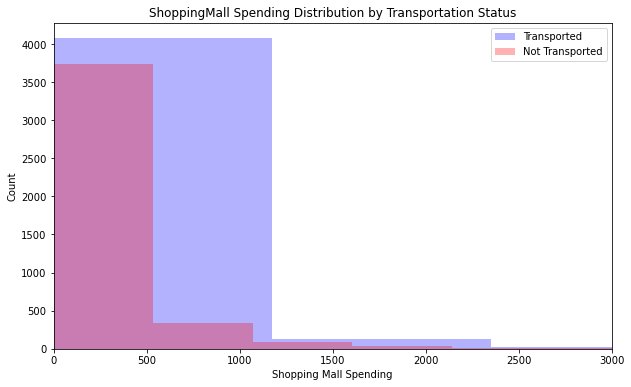

Correlation between 'ShoppingMall' and 'Transported': 0.01014089002427716


In [57]:
print("Transported (ShoppingMall): \n" + "-" * 50 + f"\n{train['ShoppingMall'][train['Transported'] == True].describe()}")
print()
print("Not Transported (ShoppingMall): \n" + "-" * 50 + f"\n{train['ShoppingMall'][train['Transported'] == False].describe()}")

fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for ShoppingMall spending by transportation status
ax.hist(train['ShoppingMall'][train['Transported'] == True], bins=20, alpha=0.3, color='blue', label='Transported')
ax.hist(train['ShoppingMall'][train['Transported'] == False], bins=20, alpha=0.3, color='red', label='Not Transported')

ax.set_title('ShoppingMall Spending Distribution by Transportation Status')
ax.set_xlabel('Shopping Mall Spending')
ax.set_ylabel('Count')
ax.set_xlim(0, 3000)
ax.legend()
plt.show()

print(f"Correlation between 'ShoppingMall' and 'Transported': {train['ShoppingMall'].corr(train['Transported'])}")


Transported (Spa): 
--------------------------------------------------
count    4287.000000
mean       61.675531
std       262.682871
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      4103.000000
Name: Spa, dtype: float64

Not Transported (Spa): 
--------------------------------------------------
count     4223.000000
mean       564.382666
std       1551.356047
min          0.000000
25%          0.000000
50%          4.000000
75%        453.500000
max      22408.000000
Name: Spa, dtype: float64


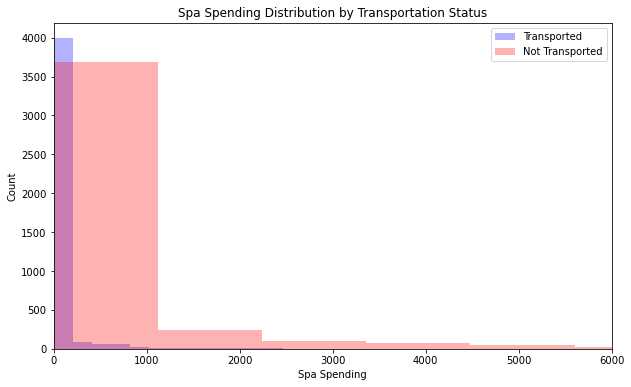

Correlation between 'Spa' and 'Transported': -0.22113134924572822


In [58]:
print("Transported (Spa): \n" + "-" * 50 + f"\n{train['Spa'][train['Transported'] == True].describe()}")
print()
print("Not Transported (Spa): \n" + "-" * 50 + f"\n{train['Spa'][train['Transported'] == False].describe()}")

fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for Spa spending by transportation status
ax.hist(train['Spa'][train['Transported'] == True], bins=20, alpha=0.3, color='blue', label='Transported')
ax.hist(train['Spa'][train['Transported'] == False], bins=20, alpha=0.3, color='red', label='Not Transported')

ax.set_title('Spa Spending Distribution by Transportation Status')
ax.set_xlabel('Spa Spending')
ax.set_ylabel('Count')
ax.set_xlim(0, 6000)
ax.legend()
plt.show()

print(f"Correlation between 'Spa' and 'Transported': {train['Spa'].corr(train['Transported'])}")

Transported (VRDeck): 
--------------------------------------------------
count    4280.000000
mean       69.148131
std       291.658171
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      5063.000000
Name: VRDeck, dtype: float64

Not Transported (VRDeck): 
--------------------------------------------------
count     4225.000000
mean       543.629822
std       1563.088368
min          0.000000
25%          0.000000
50%          1.000000
75%        388.000000
max      24133.000000
Name: VRDeck, dtype: float64


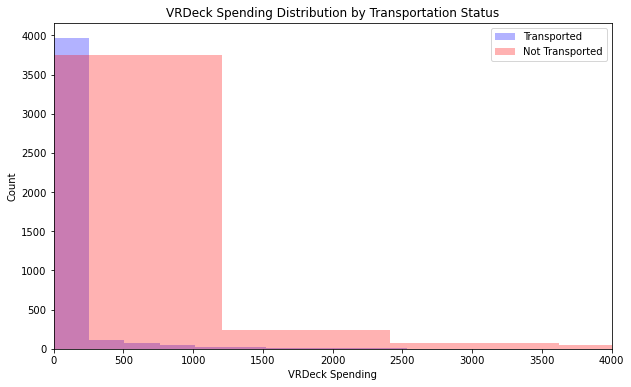

Correlation between 'VRDeck' and 'Transported': -0.2070753895842899


In [59]:
print("Transported (VRDeck): \n" + "-" * 50 + f"\n{train['VRDeck'][train['Transported'] == True].describe()}")
print()
print("Not Transported (VRDeck): \n" + "-" * 50 + f"\n{train['VRDeck'][train['Transported'] == False].describe()}")

fig, ax = plt.subplots(figsize=(10, 6))

# Histogram for VRDeck spending by transportation status
ax.hist(train['VRDeck'][train['Transported'] == True], bins=20, alpha=0.3, color='blue', label='Transported')
ax.hist(train['VRDeck'][train['Transported'] == False], bins=20, alpha=0.3, color='red', label='Not Transported')

ax.set_title('VRDeck Spending Distribution by Transportation Status')
ax.set_xlabel('VRDeck Spending')
ax.set_ylabel('Count')
ax.set_xlim(0, 4000)
ax.legend()
plt.show()

print(f"Correlation between 'VRDeck' and 'Transported': {train['VRDeck'].corr(train['Transported'])}")

It seems that generally the more passengers spend, the less chance they have to be transported.

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Destination   8511 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
dtypes: Int64(1), bool(1), category(1), float64(6), objec

In [61]:
train[train['Spa'].isna()].head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide,CabNumBinned
48,0050_01,Earth,False,55 Cancri e,35.0,False,790.0,0.0,0.0,NaN,0.0,Sony Lancis,False,E,1,S,1
143,0164_01,Earth,False,TRAPPIST-1e,57.0,False,50.0,1688.0,0.0,NaN,135.0,Fany Hutchinton,True,G,28,S,1
245,0265_01,Europa,True,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,NaN,0.0,Etair Herpumble,True,D,8,S,1
269,0294_01,Europa,True,TRAPPIST-1e,50.0,False,0.0,0.0,0.0,NaN,0.0,Phonons Roforhauge,True,B,8,S,1
289,0320_01,Earth,False,TRAPPIST-1e,18.0,False,0.0,2.0,0.0,NaN,0.0,Breney Bellarkerd,False,G,44,S,1
431,0463_01,Mars,False,TRAPPIST-1e,34.0,False,865.0,0.0,257.0,NaN,35.0,Grats Staf,False,F,100,P,1
457,0498_02,Europa,True,55 Cancri e,46.0,False,0.0,0.0,0.0,NaN,0.0,Kastrak Preent,True,B,18,S,1
461,0501_01,Europa,False,TRAPPIST-1e,42.0,False,0.0,929.0,967.0,NaN,481.0,Hadirk Spedlybood,False,E,32,P,1
583,0607_02,Europa,False,55 Cancri e,44.0,False,434.0,3113.0,19.0,NaN,892.0,Mino Hontichre,False,C,22,P,1
590,0614_01,Earth,False,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,NaN,0.0,Feline Carterson,True,G,91,S,1


## Name

In [62]:
train['Name'].head()

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object

In [63]:
train['Name'].nunique()

8473

In [64]:
train[train['Name'].isna()].head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide,CabNumBinned
27,0022_01,Mars,False,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False,D,0,P,1
58,0064_01,Mars,True,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,F,14,S,1
65,0069_01,Earth,False,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,6.0,0.0,NaN,True,F,16,S,1
77,0082_03,Mars,False,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,F,16,P,1
101,0108_02,Earth,False,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,0.0,0.0,NaN,False,G,19,S,1
126,0136_01,Earth,False,PSO J318.5-22,47.0,False,97.0,418.0,126.0,25.0,55.0,NaN,False,G,23,S,1
165,0190_01,Earth,True,55 Cancri e,11.0,False,0.0,0.0,0.0,0.0,0.0,NaN,False,G,32,S,1
297,0330_02,Europa,False,TRAPPIST-1e,32.0,False,247.0,4651.0,0.0,46.0,202.0,NaN,True,C,14,S,1
305,0337_03,Mars,False,55 Cancri e,0.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True,F,63,S,1
331,0372_01,Earth,False,TRAPPIST-1e,24.0,False,0.0,5.0,0.0,2766.0,0.0,NaN,False,F,85,P,1


In [65]:
train[train['Name'].isna()].groupby('Transported').value_counts()

Series([], Name: count, dtype: int64)

In [66]:
# Assuming 'Transported' is a column in the DataFrame
# First, create a mask for names containing 'sir'
contains_sir = train['Name'].str.lower().str.contains('sir')

# Group this mask by the 'Transported' column and sum the True values in each group
sir_counts_by_transport_status = contains_sir.groupby(train['Transported']).sum()

print(sir_counts_by_transport_status)

Transported
False    1
True     6
Name: Name, dtype: object


In [67]:
# List of esteemed titles (maintained in lowercase for comparison)
titles = ['mr.', 'mrs.', 'ms.', 'dr.', 'sir', 'lady', 'lord', 'prof.', 'captain', 'major', 'colonel', 'judge', 'rev.', 'hon.', 'phd']

# Function to find title in name, case-insensitively
def find_title(name):
    # Check if 'name' is a string instance before conversion
    if isinstance(name, str):
        lower_name = name.lower()  # Convert name to lowercase
        for title in titles:
            if title in lower_name:  # Check presence in the lowercased name
                return title
    return 'none'  # Return 'none' if no title is found or if 'name' is not a string

# Apply the function to create a new column
train['Title'] = train['Name'].apply(find_title)

# Group by Title and Transported
status_by_title = train.groupby(['Title', 'Transported']).size().unstack(fill_value=0)

print(status_by_title)

Transported  False  True 
Title                    
major            1      2
none          4312   4368
phd              1      2
sir              1      6


# Data Processing

In [68]:
# Fill in na vals
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Destination   8511 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
 17  Title         8693 non-null   object  
dtypes: Int64

In [69]:
train['HomePlanet'].describe()

count      8492
unique        3
top       Earth
freq       4602
Name: HomePlanet, dtype: object

In [70]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [71]:
train['HomePlanet'].fillna('Earth', inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Destination   8511 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
 17  Title         8693 non-null   object  
dtypes: Int64

In [72]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [73]:
train[train['CryoSleep'].isna()].head(10)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide,CabNumBinned,Title
92,0099_02,Earth,NaN,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True,G,12,P,1,none
98,0105_01,Earth,NaN,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False,F,21,P,1,none
104,0110_02,Europa,NaN,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False,B,5,P,1,none
111,0115_01,Mars,NaN,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True,F,24,P,1,none
152,0173_01,Earth,NaN,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True,E,11,S,1,none
175,0198_01,Earth,NaN,PSO J318.5-22,52.0,False,0.0,0.0,0.0,0.0,0.0,Jeroy Cookson,True,G,30,P,1,none
224,0241_01,Europa,NaN,55 Cancri e,33.0,False,0.0,1249.0,0.0,4812.0,1116.0,Alas Dischod,False,E,11,P,1,none
266,0290_03,Europa,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,0.0,0.0,Dhenar Excialing,True,B,7,S,1,none
314,0348_02,Mars,NaN,TRAPPIST-1e,36.0,False,520.0,0.0,1865.0,0.0,0.0,Weet Mane,True,NaN,427,NaN,3,none
392,0433_01,Europa,NaN,55 Cancri e,27.0,False,0.0,0.0,0.0,0.0,0.0,Hekark Mormonized,True,B,20,P,1,none


In [74]:
train['CryoSleep'].describe()

count      8476
unique        2
top       False
freq       5439
Name: CryoSleep, dtype: object

In [75]:
train['CryoSleep'].fillna(train.CryoSleep.mode()[0], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8693 non-null   bool    
 3   Destination   8511 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
 17  Title         8693 non-null   object  
dtypes: Int64

In [76]:
train['CryoSleep'].value_counts()

CryoSleep
False    5656
True     3037
Name: count, dtype: int64

In [77]:
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [78]:
train['Destination'].fillna(train.Destination.mode()[0], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8693 non-null   bool    
 3   Destination   8693 non-null   object  
 4   Age           8514 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
 17  Title         8693 non-null   object  
dtypes: Int64

In [79]:
train['Age'].fillna(train.Age.median(), inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8693 non-null   bool    
 3   Destination   8693 non-null   object  
 4   Age           8693 non-null   float64 
 5   VIP           8490 non-null   object  
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
 17  Title         8693 non-null   object  
dtypes: Int64

In [80]:
train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [81]:
train['VIP'].fillna(train.VIP.mode()[0], inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8693 non-null   bool    
 3   Destination   8693 non-null   object  
 4   Age           8693 non-null   float64 
 5   VIP           8693 non-null   bool    
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
 17  Title         8693 non-null   object  
dtypes: Int64

In [82]:
columns_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Loop through each column and fill missing values with the median of that column
for column in columns_to_fill:
    median_value = train[column].median()
    train[column].fillna(median_value, inplace=True)

# Check the results
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8693 non-null   object  
 2   CryoSleep     8693 non-null   bool    
 3   Destination   8693 non-null   object  
 4   Age           8693 non-null   float64 
 5   VIP           8693 non-null   bool    
 6   RoomService   8693 non-null   float64 
 7   FoodCourt     8693 non-null   float64 
 8   ShoppingMall  8693 non-null   float64 
 9   Spa           8693 non-null   float64 
 10  VRDeck        8693 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  CabDeck       8494 non-null   object  
 14  CabNum        8693 non-null   Int64   
 15  CabSide       8494 non-null   object  
 16  CabNumBinned  8693 non-null   category
 17  Title         8693 non-null   object  
dtypes: Int64

In [83]:
train['Name']

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [84]:
# Step 1: Extract last names, handling NaN values
train['LastName'] = train['Name'].apply(lambda x: x.split(' ')[1] if pd.notna(x) else 'Unknown')

# Step 2: Count each last name in the dataset
lastname_counts = train['LastName'].value_counts()

# Step 3: Assign family member count to a new column
# Since 'Unknown' might artificially inflate counts, we handle it separately if necessary
train['FamilySize'] = train['LastName'].apply(lambda x: lastname_counts[x] - 1 if x != 'Unknown' else 0)


In [85]:
train.groupby('FamilySize')['Transported'].value_counts()

FamilySize  Transported
0           True           324
            False          258
1           False          405
            True           395
2           True           622
            False          542
3           True           645
            False          635
4           True           652
            False          628
5           False          520
            True           518
6           False          432
            True           401
7           False          297
            True           247
8           False          163
            True           152
9           True           153
            False          147
10          True           139
            False          136
11          False           48
            True            36
12          False           42
            True            36
13          False           29
            True            27
14          True            18
            False           12
15          False           10
            Tru

In [86]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabDeck,CabNum,CabSide,CabNumBinned,Title,LastName,FamilySize
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,1,none,Ofracculy,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,1,none,Vines,3
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,1,none,Susent,5
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,1,none,Susent,5
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,1,none,Santantines,5


In [87]:
# Assuming 'Transported' is a binary column where True indicates transported
transported_family = train.groupby('FamilySize')['Transported'].value_counts().unstack(fill_value=0)
print(transported_family)


Transported  False  True 
FamilySize               
0              258    324
1              405    395
2              542    622
3              635    645
4              628    652
5              520    518
6              432    401
7              297    247
8              163    152
9              147    153
10             136    139
11              48     36
12              42     36
13              29     27
14              12     18
15              10      6
17              11      7


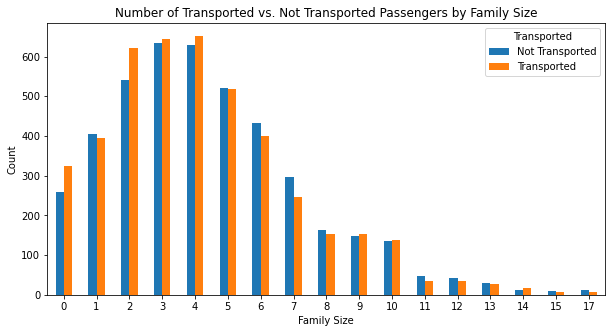

In [88]:
# Plotting
transported_family.plot(kind='bar', stacked=False, figsize=(10, 5))
plt.title('Number of Transported vs. Not Transported Passengers by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keeps the x-labels vertical for readability
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

In [89]:
train['FamilySize'].corr(train['Transported'])

-0.03216881558756051

In [90]:
train['CabDeck'].value_counts()

CabDeck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [91]:
train['CabDeck'].fillna(train.CabDeck.mode()[0], inplace=True)
train['CabSide'].fillna(train.CabSide.mode()[0], inplace=True)

In [92]:
# Drop unneeded columns
train_dropped = train.drop(columns=['PassengerId', 'Name', 'CabNumBinned', 'Title', 'LastName'], axis=1)
train_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  CabDeck       8693 non-null   object 
 12  CabNum        8693 non-null   Int64  
 13  CabSide       8693 non-null   object 
 14  FamilySize    8693 non-null   int64  
dtypes: Int64(1), bool(3), float64(6), int64(1), object(4)
memory usage: 849.1+ KB


## Converting Categorical Columns to Numeric

In [97]:
train_dum = pd.get_dummies(train_dropped, drop_first=True, dtype=int)
train_dum.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabNum,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabDeck_B,CabDeck_C,CabDeck_D,CabDeck_E,CabDeck_F,CabDeck_G,CabDeck_T,CabSide_S
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,...,0,1,1,0,0,0,0,0,0,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,...,0,1,0,0,0,0,1,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,...,0,1,0,0,0,0,0,0,0,1
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,...,0,1,0,0,0,0,0,0,0,1
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,...,0,1,0,0,0,0,1,0,0,1


In [100]:
train_dum['CryoSleep'] = train_dum['CryoSleep'].astype(int)

In [102]:
train_dum['VIP'] = train_dum['VIP'].astype(int)
train_dum['Transported'] = train_dum['Transported'].astype(int)
train_dum.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabNum,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CabDeck_B,CabDeck_C,CabDeck_D,CabDeck_E,CabDeck_F,CabDeck_G,CabDeck_T,CabSide_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,...,0,1,0,0,0,0,1,0,0,1


In [103]:
train_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int64  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int64  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   int64  
 9   CabNum                     8693 non-null   Int64  
 10  FamilySize                 8693 non-null   int64  
 11  HomePlanet_Europa          8693 non-null   int64  
 12  HomePlanet_Mars            8693 non-null   int64  
 13  Destination_PSO J318.5-22  8693 non-null   int64

In [104]:
# Splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [105]:
X = train_dum.drop('Transported', axis=1)
y = train_dum['Transported']

X.shape, y.shape

((8693, 22), (8693,))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
X_train.shape, X_test.shape

((6954, 22), (1739, 22))

In [107]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [118]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import GridSearchCV

In [110]:
logit = LogisticRegressionCV(cv=10)

logit.fit(X_train, y_train)

LogisticRegressionCV(cv=10)

In [111]:
y_pred = logit.predict(X_test)

In [112]:
from sklearn.metrics import accuracy_score, f1_score

In [114]:
logit_acc = accuracy_score(y_test, y_pred)
logit_f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {logit_acc}\nF1 Score: {logit_f1}')

Accuracy: 0.7745830937320299
F1 Score: 0.7780294450736127


In [120]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # No 'classifier__' prefix
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

# Assuming new_logit is a LogisticRegression configured for Elastic Net
new_logit = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Setup the grid search with cross-validation
grid_search = GridSearchCV(new_logit, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [121]:
logit_acc = accuracy_score(y_test, y_pred)
logit_f1 = f1_score(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {logit_acc}\nF1 Score: {logit_f1}')

Best Parameters: {'C': 1, 'l1_ratio': 0}
Accuracy: 0.7745830937320299
F1 Score: 0.7780294450736127
